# Vérification poutre bois en flexion simple avec prise en compte du déversement

In [1]:
from math import *
import ipywidgets as widgets
from tkinter import *
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Javascript, display
from ipywidgets import widgets
import pandas as pd
from math import *
import ipywidgets as widgets
from tkinter import *

## 1. Données d'entrée

### 1.1. Références normatives

*- NF EN 1995 + AN : Conception et calcul des structures en bois*

### 1.2. Matériau

In [2]:
bois=widgets.Dropdown(
    options=['Résineux','Feuillus','Lamellé collé'],
    value='Résineux',
    description='Bois :',
    disabled=False,
)
bois

Dropdown(description='Bois :', options=('Résineux', 'Feuillus', 'Lamellé collé'), value='Résineux')

In [3]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [20]:
if bois.value=='Résineux':
    classe=widgets.Dropdown(
        options=['C14','C16','C18','C20','C22','C24','C27','C30','C35','C40'],
        value='C20',
        description='Classe :',
        disabled=False,
)
elif bois.value=='Feuillus':
    classe=widgets.Dropdown(
        options=['D30','D35','D40','D50','D60','D70'],
        value='D30',
        description='Classe :',
        disabled=False,
)
else:
    classe=widgets.Dropdown(
        options=['GL24h','GL28h','GL32h','GL36h','GL24c','GL28c','GL32c','GL36c'],
        value='GL24h',
        description='Classe :',
        disabled=False,
)

display(classe)

Dropdown(description='Classe :', options=('D30', 'D35', 'D40', 'D50', 'D60', 'D70'), value='D30')

In [5]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+5)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [21]:
import pandas as pd

caracbois=pd.read_excel("caracB.xlsx")

fmk=caracbois.loc[0,classe.value]
ft0k=caracbois.loc[1,classe.value]
ft90k=caracbois.loc[2,classe.value]
fc0k=caracbois.loc[3,classe.value]
fc90k=caracbois.loc[4,classe.value]
fvk=caracbois.loc[5,classe.value]
e0m=caracbois.loc[6,classe.value]
e05=caracbois.loc[7,classe.value]
pm=caracbois.loc[8,classe.value]

### 1.3. Exposition

In [22]:
service=widgets.ToggleButtons(
    options=['Classe de service 1', 'Classe de service 2', 'Classe de service 3'],
    description='',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
   
)
service

ToggleButtons(options=('Classe de service 1', 'Classe de service 2', 'Classe de service 3'), value='Classe de …

### 1.4. Géométrie

In [8]:
l=widgets.FloatSlider(
    value=4,
    min=0,
    max=15,
    step=0.5,
    description=('Portée [m]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)
l

FloatSlider(value=4.0, continuous_update=False, description='Portée [m]', max=15.0, readout_format='.1f', step…

### 1.5. Chargement

In [9]:
g=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='G [kN/m]:',
    disabled=False)

q=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='Q [kN/m]:',
    disabled=False)

s=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='S [kN/m]:',
    disabled=False
)

w=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='W [kN/m]:',
    disabled=False)

catq=widgets.Dropdown(
        options=['A','B','C','D','E','F','G','H'],
        value='A',
        description='Cat. Q :',
        disabled=False,)

cats=widgets.Dropdown(
        options=['Finlande,etc','1000+','1000-'],
        value='1000-',
        description='Cat. S :',
        disabled=False,)


display(g,q,s,w,catq,cats)

BoundedFloatText(value=0.0, description='G [kN/m]:', step=0.1)

BoundedFloatText(value=0.0, description='Q [kN/m]:', step=0.1)

BoundedFloatText(value=0.0, description='S [kN/m]:', step=0.1)

BoundedFloatText(value=0.0, description='W [kN/m]:', step=0.1)

Dropdown(description='Cat. Q :', options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'), value='A')

Dropdown(description='Cat. S :', index=2, options=('Finlande,etc', '1000+', '1000-'), value='1000-')

In [10]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+7)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [195]:
import pandas as pd
kmod0=kmod1=kmod2=kmod3=kmod4=kmod5=kmod6=kmod7=kmod8=kmod9=kmod10=kmod12=kmod12=0

if bois.value=='Lamellé collé':
    gm=1.25
else:
    gm=1.3

coeff=pd.read_excel("caracB.xlsx")

psi0q=coeff.loc[0,catq.value]
psi1q=coeff.loc[1,catq.value]
psi2q=coeff.loc[2,catq.value]
psi0w=coeff.loc[0,'W']
psi1w=coeff.loc[1,'W']
psi2w=coeff.loc[2,'W']
psi0s=coeff.loc[0,cats.value]
psi1s=coeff.loc[1,cats.value]
psi2s=coeff.loc[2,cats.value]

if service.value=='Classe de service 3':
    kmod0=0.5
    kmod1=0.65
    kmod2=kmod9=kmod10=0.7
    kmod3=kmod4=kmod5=kmod6=kmod7=kmod8=kmod11=kmod12=0.9
else :
    kmod0=0.6
    kmod1=0.8
    kmod2=kmod9=kmod10=0.9
    kmod3=kmod4=kmod5=kmod6=kmod7=kmod8=kmod11=kmod12=1.1
    
c0=(1.35*g.value)/kmod0
c1=(1.35*g.value+1.5*q.value)/kmod1
c2=(1.35*g.value+1.5*q.value+1.5*psi0s*s.value)/kmod2
c3=(1.35*g.value+1.5*q.value+1.5*psi0w*w.value)/kmod3
c4=(1.35*g.value+1.5*q.value+1.5*psi0s*s.value+1.5*psi0w*w.value)/kmod4
c5=(1.35*g.value+1.5*w.value)/kmod5
c6=(1.35*g.value+1.5*w.value+1.5*psi0q*q.value)/kmod6
c7=(1.35*g.value+1.5*w.value+1.5*psi0s*s.value)/kmod7
c8=(1.35*g.value+1.5*w.value+1.5*psi0q*q.value+1.5*psi0s*s.value)/kmod8
c9=(1.35*g.value+1.5*s.value)/kmod9
c10=(1.35*g.value+1.5*s.value+1.5*psi0q*q.value)/kmod10
c11=(1.35*g.value+1.5*s.value+1.5*psi0w*w.value)/kmod11
c12=(1.35*g.value+1.5*s.value+1.5*psi0w*w.value+1.5*psi0q*q.value)/kmod12

c0=round(c0,2)
c1=round(c1,2)
c2=round(c2,2)
c3=round(c2,2)
c4=round(c4,2)
c5=round(c5,2)
c6=round(c6,2)
c7=round(c7,2)
c8=round(c8,2)
c9=round(c9,2)
c10=round(c10,2)
c11=round(c11,2)
c12=round(c12,2)

pmax=max(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12)

## 2. Dimensionnement de la poutre à l'ELU

### 2.1. Combinaisons d'actions à l'ELU

|Combinaison ELU (majoration par kmod) |$$P_{ELU,mod}$$ [kN/m]|
|-----------|-------------|
|$$1.35G$$|{{c0}}|
|$$1.35G+1.5Q$$|{{c1}}|
|$$1.35G+1.5Q+1.5\psi_{0,S}S$$|{{c2}}|
|$$1.35G+1.5Q+1.5\psi_{0,W}W$$|{{c3}}|
|$$1.35G+1.5Q+1.5\psi_{0,S}S+1.5\psi_{0,W}W$$|{{c4}}|
|$$1.35G+1.5W$$|{{c5}}|
|$$1.35G+1.5W+1.5\psi_{0,Q}Q$$|{{c6}}|
|$$1.35G+1.5W+1.5\psi_{0,S}S$$|{{c7}}|
|$$1.35G+1.5W+1.5\psi_{0,Q}Q+1.5\psi_{0,S}S$$|{{c8}}|
|$$1.35G+1.5S$$|{{c9}}|
|$$1.35G+1.5S+1.5\psi_{0,Q}Q$$|{{c10}}|
|$$1.35G+1.5S+1.5\psi_{0,W}W$$|{{c11}}|
|$$1.35G+1.5S+1.5\psi_{0,Q}Q+1.5\psi_{0,W}W$$|{{c12}}|
|$$P_{ELU,mod,max}$$|**{{pmax}}**|

### 2.2. Charge ELU admissible en fonction de la section

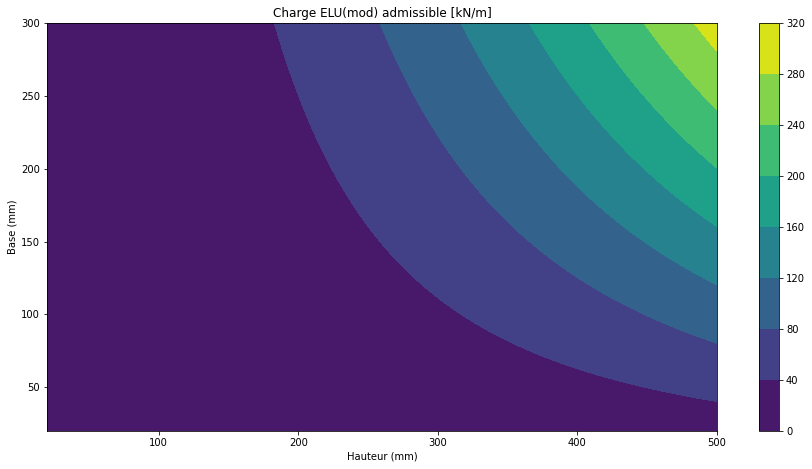

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

## Déclaration des axes du graphe

xlist = np.linspace(20,500, 100)
ylist = np.linspace(20,300, 100)

X, Y = np.meshgrid(xlist, ylist)

## Calcul de lrel pour Kcrit  

sigcrit=(0.78*e05*Y*Y)/(X*0.9)

lrel=(fmk/sigcrit)**2

## Fonction pour déterminer le moment max

def f(X,Y):
    for lrel in np.arange(0,0.75) : return (4*Y*(X**2)*fmk*1)/(3*(l.value*1000)**2*gm)
    for lrel in np.arange(0,75,1.4) : return (4*Y*(X**2)*fmk*(1.56-0.75*lrel))/(3*(l.value*1000)**2*gm)
    for lrel in np.arange(1.4,100) : return (4*Y*(X**2)*fmk*(1/(lrel**2))/(3*(l.value*1000)**2*gm))
  
Z = f(X,Y)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Charge ELU(mod) admissible [kN/m]')
ax.set_xlabel('Hauteur (mm)')
ax.set_ylabel('Base (mm)')
plt.rcParams["figure.figsize"] = (15, 7.5)
plt.show()

### 2.3. Section optimale pour une hauteur fixée à l'ELU

In [13]:
h=widgets.FloatSlider(
    value=200,
    min=0,
    max=600,
    step=20,
    description=('Hauteur [mm]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)
h

FloatSlider(value=200.0, continuous_update=False, description='Hauteur [mm]', max=600.0, readout_format='.1f',…

In [162]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+11)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [300]:
def b():
    for lrel in np.arange(0,0.75) : return (3*(l.value)**2*pmax*gm)/(4*h.value**2*fmk*1)
    for lrel in np.arange(0,75,1.4) : return (3*(l.value)**2*pmax*gm)/(4*h.value**2*fmk*(1.56-0.75*lrel))
    for lrel in np.arange(1.4,100) : return (3*(l.value)**2*pmax*gm)/(4*h.value**2*fmk*(1/(lrel**2)))
  
b=b()
                                                                      
b=round(b,5)

b=b*1000**2

***Section : {{b}}x{{h.value}}mm ht.***

|**Caractéristiques**|**Valeur**|
|-----------|-------------|
|**Type de bois**|{{bois.value}}|
|**Classe de structure**|{{classe.value}}|
|**Exposition**|{{service.value}}|
|**Charge max ELU [kN/m]**|{{pmax}}|
|**Portée [m]**|{{l.value}}|
|**Base [mm]**|{{b}}|
|**Hauteur [mm]**|{{h.value}}|

## 3. Dimensionnement de la poutre à l'ELS

### 3.1. Combinaisons d'actions à l'ELS

In [301]:
cc1=g.value
cc2=g.value+q.value
cc3=g.value+q.value+psi0s*s.value
cc4=g.value+q.value+psi0w*w.value
cc5=g.value+q.value+psi0s*s.value+psi0w*w.value
cc6=g.value+w.value
cc7=g.value+w.value+psi0q*q.value
cc8=g.value+w.value+psi0s*s.value
cc9=g.value+w.value+psi0q*q.value+psi0s*s.value
cc10=g.value+s.value
cc11=g.value+s.value+psi0q*q.value
cc12=g.value+s.value+psi0w*w.value
cc13=g.value+s.value+psi0q*q.value+psi0w*w.value
pcmax=max(cc1,cc2,cc3,cc4,cc5,cc6,cc7,cc8,cc9,cc10,cc11,cc12,cc13)

cp1=g.value
cp2=g.value+psi2q*q.value
cp3=g.value+psi2w*w.value
cp4=g.value+psi2s*s.value
cp5=g.value+psi2q*q.value+psi2w*w.value
cp6=g.value+psi2q*q.value+psi2s*s.value
cp7=g.value+psi2w*w.value+psi2s*s.value
cp8=g.value+psi2q*q.value+psi2w*w.value+psi2s*s.value
pqpmax=max(cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8)

|ELS Caractéristiques|$$P_{ELS}$$ [kN/m]|
|-----------|-------------|
|Caractéristiques||
|$$G$$|{{cc1}}|
|$$G+Q$$|{{cc2}}|
|$$G+Q+\psi_{0,S}S$$|{{cc3}}|
|$$G+Q+\psi_{0,W}W$$|{{cc4}}|
|$$G+Q+\psi_{0,S}S+\psi_{0,W}W$$|{{cc5}}|
|$$G+W$$|{{cc6}}|
|$$G+W+\psi_{0,Q}Q$$|{{cc7}}|
|$$G+W+\psi_{0,S}S$$|{{cc8}}|
|$$G+W+\psi_{0,Q}Q+\psi_{0,S}S$$|{{cc9}}|
|$$G+S$$|{{cc10}}|
|$$G+S+\psi_{0,Q}Q$$|{{cc11}}|
|$$G+S+\psi_{0,W}W$$|{{cc12}}|
|$$G+S+\psi_{0,Q}Q+\psi_{0,W}W$$|{{cc13}}|
|$$P_{ELS,carac,max}$$|**{{pcmax}}**|


|ELS Quasi-permanentes|$$P_{ELS}$$ [kN/m]|
|-----------|-------------|
|$$G$$|{{cp1}}|
|$$G+\psi_{2,Q}Q$$|{{cp2}}|
|$$G+\psi_{2,S}S$$|{{cp3}}|
|$$G+\psi_{2,W}W$$|{{cp4}}|
|$$G+\psi_{2,Q}Q+\psi_{2,W}W$$|{{cp5}}|
|$$G+\psi_{2,Q}W+\psi_{2,S}S$$|{{cp6}}|
|$$G+\psi_{2,W}W+\psi_{2,S}S$$|{{cp7}}|
|$$G+\psi_{2,W}W+\psi_{2,Q}Q+\psi_{2,S}S$$|{{cp8}}|
|$$P_{ELS,qp,max}$$|**{{pqpmax}}**|

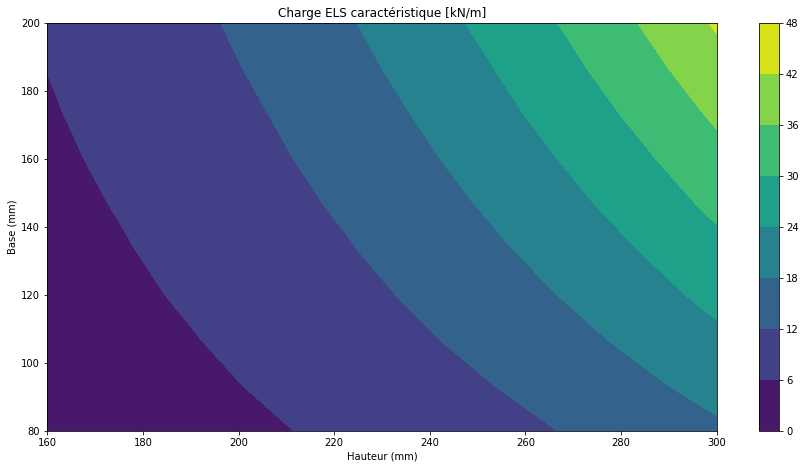

In [302]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

## Déclaration des axes du graphe

winstmax=(l.value*1000)/300

xlist = np.linspace(160,300, 10)
ylist = np.linspace(80,200, 10)

X, Y = np.meshgrid(xlist, ylist)

## Fonction pour déterminer la flèche

def m(X,Y):
    return ((32*Y*e0m*1000*X**3*winstmax)/(5*(l.value*1000)**4))
  
Z = m(X,Y)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
cp.set_clim()
ax.set_title('Charge ELS caractéristique [kN/m]')
ax.set_xlabel('Hauteur (mm)')
ax.set_ylabel('Base (mm)') 
plt.rcParams["figure.figsize"] = (15, 7.5)
plt.show()

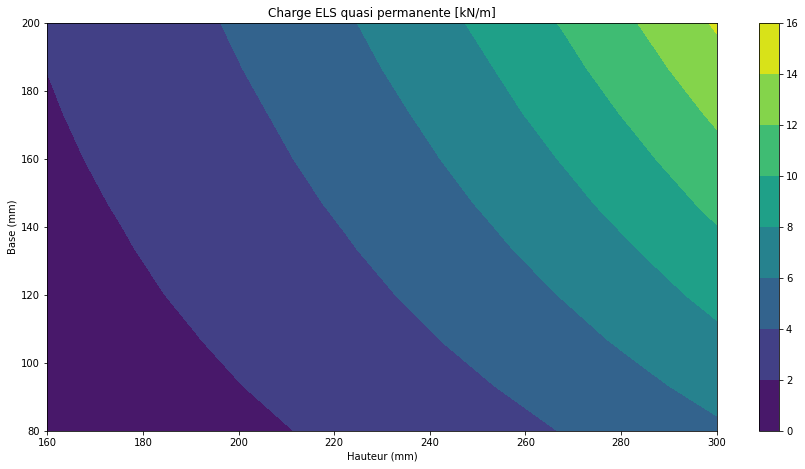

In [303]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

wfinmax=(l.value*1000)/200

wfluage=wfinmax-winstmax

if service=='Classe de service 1':
    kdef=0.6
elif service=='Classe de service 2':
    kdef=0.8
else:
    kdef=2

## Déclaration des axes du graphe

xlist = np.linspace(160,300, 10)
ylist = np.linspace(80,200, 10)

X, Y = np.meshgrid(xlist, ylist)

## Fonction pour déterminer la flèche

def zz(X,Y):
    return ((32*Y*e0m*1000*X**3*winstmax)/(5*(l.value*1000)**4*(kdef+1)))
  
Z = zz(X,Y)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('Charge ELS quasi permanente [kN/m]')
ax.set_xlabel('Hauteur (mm)')
ax.set_ylabel('Base (mm)')
plt.rcParams["figure.figsize"] = (15, 7.5)
plt.show()

### 3.3. Section optimale pour une hauteur fixée à l'ELS

In [161]:
h2=widgets.FloatSlider(
    value=200,
    min=0,
    max=600,
    step=20,
    description=('Hauteur [mm]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)
h2

FloatSlider(value=200.0, continuous_update=False, description='Hauteur [mm]', max=600.0, readout_format='.1f',…

In [210]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+8)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [314]:
bc1=(5*(l.value*1000)**4*pcmax)/(32*e0m*1000*h2.value**3*winstmax)

bqp1=(5*(l.value*1000)**4*(pcmax+pqpmax+kdef*pqpmax))/(32*e0m*1000*h2.value**3*wfinmax)

bels=max(bc1,bqp1)

bels=round(bels/1000,2)

bels=bels*1000

***Section : {{bels}}x{{h2.value}}mm ht.***

## 4. Caractéristiques de la poutre satisfaisant ELU et ELS

In [315]:
hfinal=max(h.value,h2.value)

if hfinal==h2.value:
    bfinal=bels
else:
    bfinal=b

|**Caractéristiques**|**Valeur**|
|-----------|-------------|
|**Type de bois**|{{bois.value}}|
|**Classe de structure**|{{classe.value}}|
|**Exposition**|{{service.value}}|
|**Charge max ELU [kN/m]**|{{pmax}}|
|**Charge max carac. ELS [kN/m]**|{{pcmax}}|
|**Chage max quasi-perm. ELS [kN/m]**|{{pqpmax}}|
|**Portée [m]**|{{l.value}}|
|**Base [mm]**|{{bfinal}}|
|**Hauteur [mm]**|{{hfinal}}|